In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
import random
import pandas as pd

#Dataset

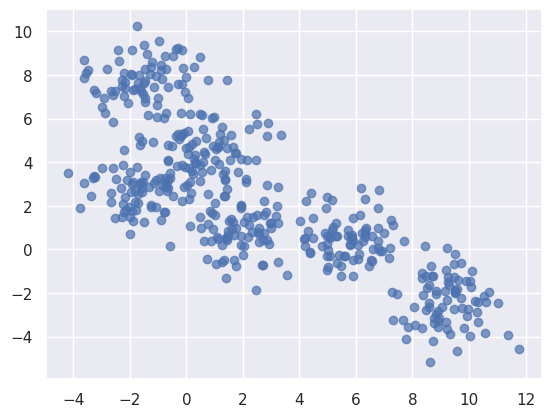

In [ ]:
X, clusters = make_blobs(n_samples=450, centers=6, cluster_std=1.0, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

#BIRCH

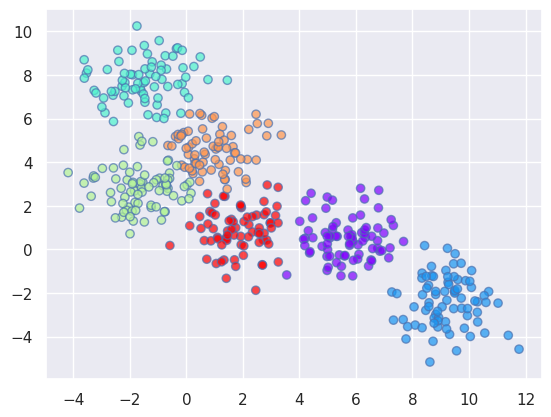

In [ ]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=3, n_clusters=None, threshold=2.0)
brc.fit(X)
labels = brc.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

#Gaussian Mixture Models

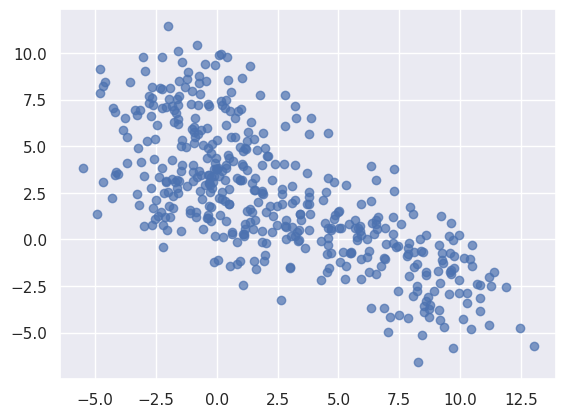

In [ ]:
#Dataset
X, clusters = make_blobs(n_samples=450, centers=6, cluster_std=1.5, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

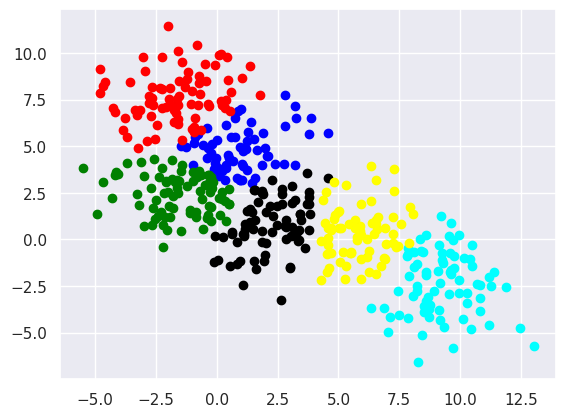

In [ ]:
# training gaussian mixture model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black', 'red', 'yellow', 'pink', 'orange', 'purple']
for k in range(0,9):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

#Affinity Propagation

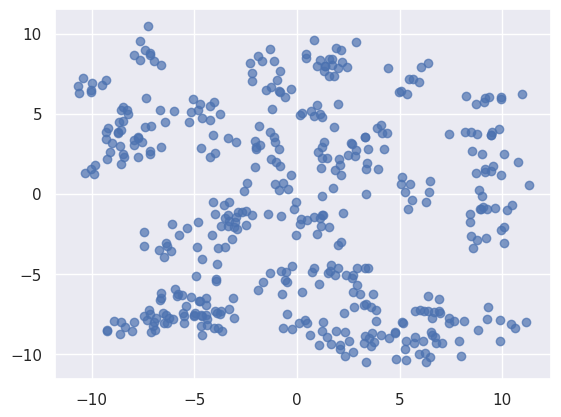

In [ ]:
#Dataset
X, clusters = make_blobs(n_samples=450, centers=50, cluster_std=0.7, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

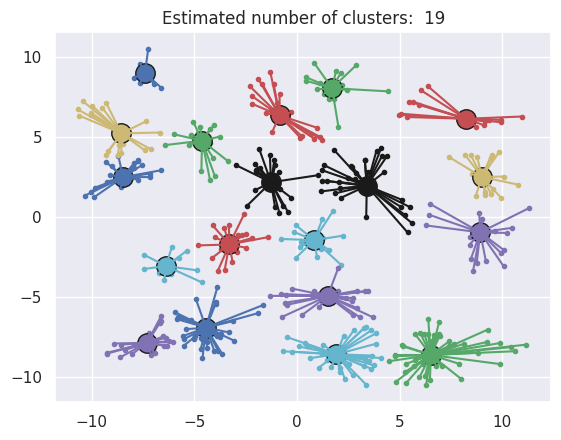

In [ ]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)

    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]],
                 [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

#Anomaly Detection: Gaussian Distribution

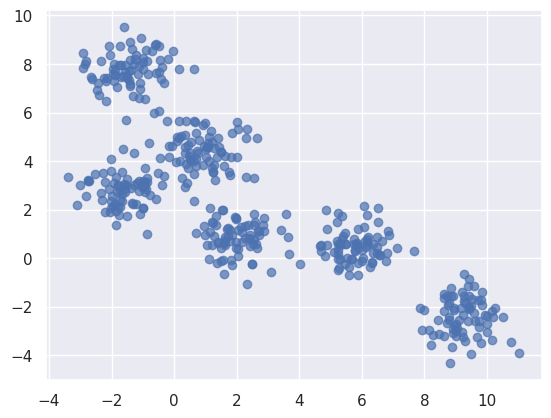

In [ ]:
#Dataset
X, clusters = make_blobs(n_samples=450, centers=6, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

In [ ]:
def estimateGaussian(X):
    m = X.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    # compute variance of X
    # print(mu, sigma)
    var = np.var(X,axis=0)
    return mu,var

In [ ]:
def multivariateGaussian(X, mu, sigma):
    k = len(mu)
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p

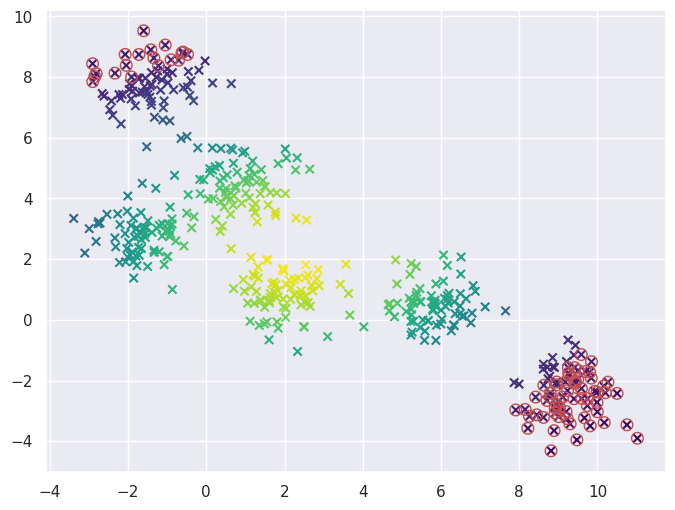

In [ ]:
mu, sigma = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis')
outliers = np.nonzero(p<0.0015)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70)

##Anomaly Detection: Local Outlier Factor

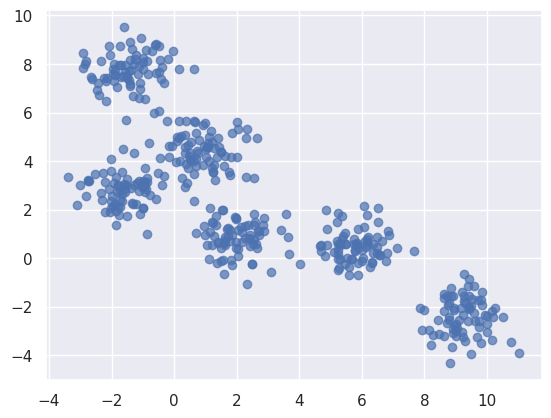

In [ ]:
#Dataset
X, clusters = make_blobs(n_samples=450, centers=6, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

<ipython-input-23-31dc58e79160>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0],X[:,1],marker="x",cmap='viridis')


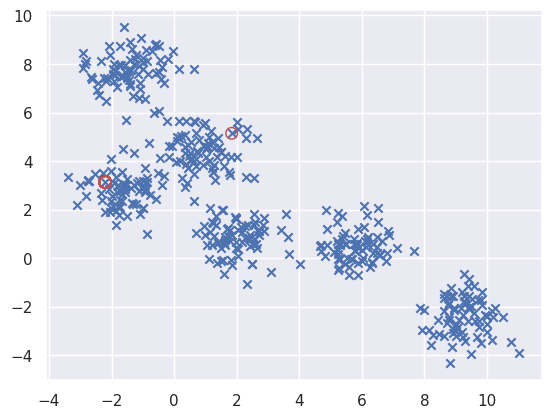

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=50)
outliers = lof.fit_predict(X)

plt.scatter(X[:,0],X[:,1],marker="x",cmap='viridis')
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70)

#Association Learning

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install apyori
from apyori import apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=2d43e9d7c546d24dfe04c715530dd696b9a3cfc50cc0288bb9423f1c17a233a2
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
#dataset
data = pd.read_csv('/content/gdrive/MyDrive/InterviewKickStarter/IK_Shivani_Rao/UML-2/transactions.csv').replace(np.nan,'',regex=True)
print(data.shape)
data.head()

(21, 4)


,Wine,Chips,Bread,Milk
0,Wine,,Bread,Milk
1,,,Bread,Milk
2,,Chips,,
3,Wine,Chips,Bread,Milk
4,Wine,Chips,,Milk


In [ ]:
records = []
for i in range(len(data)):
  records.append([str(data.values[i,j]) for j in range(data.shape[1])])
association_rules = apriori(records, min_support=0.5, min_confidence=0.7, min_length=2)
association_results= list(association_rules)

#example rule
print(association_results[2])

RelationRecord(items=frozenset({'Milk'}), support=0.7619047619047619, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Milk'}), confidence=0.7619047619047619, lift=1.0)])


#Latent Dirichlet Allocation (LDA)

In [ ]:
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Dataset
documents_list= [
    'Latent Dirichlet Allocation is a popular topic modeling algorithm used in natural language processing.',
    'Latent Dirichlet Allocation is a popular topic modeling algorithm used in natural language processing.',
    'Researchers applied Latent Dirichlet Allocation to analyze a large corpus of news articles and identify underlying themes.',
    'By using Latent Dirichlet Allocation, the team was able to uncover hidden patterns in customer reviews and extract key topics.',
    'The application of Latent Dirichlet Allocation in recommender systems improved the accuracy of personalized recommendations.']

In [ ]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
train_data = tfidf.fit_transform(documents_list)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
model=LatentDirichletAllocation(n_components=5)
lda_matrix = model.fit_transform(train_data)
lda_components=model.components_

# Print the topics with their terms
terms = tfidf.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['accuracy', 'application', 'improved', 'personalized', 'recommendations', 'recommender', 'systems']
Topic 1:  ['algorithm', 'language', 'modeling', 'natural', 'popular', 'processing', 'topic']
Topic 2:  ['analyze', 'applied', 'articles', 'corpus', 'identify', 'large', 'news']
Topic 3:  ['allocation', 'dirichlet', 'latent', 'accuracy', 'application', 'improved', 'personalized']
Topic 4:  ['allocation', 'dirichlet', 'latent', 'accuracy', 'application', 'improved', 'personalized']


#Self Organizing Maps

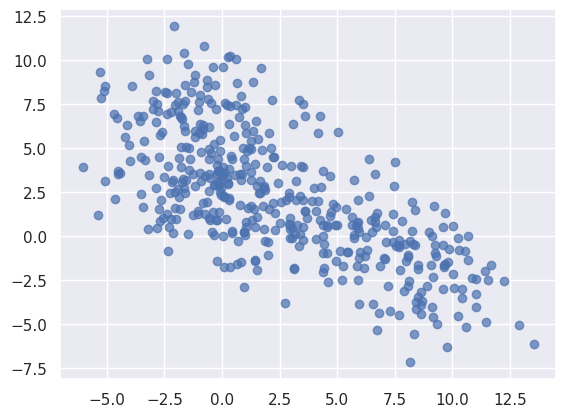

In [ ]:
#Dataset
X, clusters = make_blobs(n_samples=450, centers=6, cluster_std=1.70, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

In [ ]:
!pip install sklearn-som
from sklearn_som.som import SOM

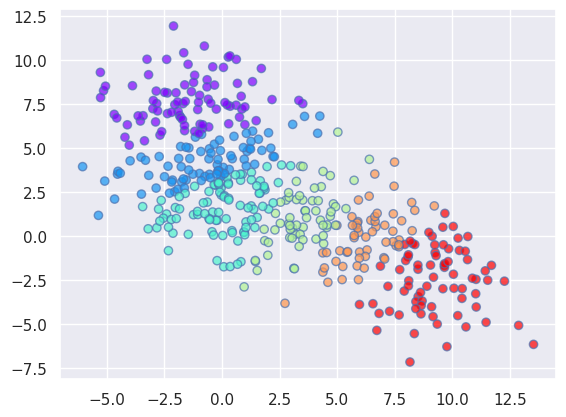

In [ ]:
clusters=6
som = SOM(m=clusters, n=1, dim=2)
som.fit(X)
predictions = som.predict(X)
plt.scatter(X[:,0], X[:,1], c=predictions, cmap='rainbow', alpha=0.7, edgecolors='b')